In [ ]:
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image
import random
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
train_dir = '../dataset/train'    
valid_dir = '../dataset/valid' 
test_dir = '../dataset/test'     

In [ ]:
def display_random_sample(dataset_dir):
    classes = os.listdir(dataset_dir)
    plt.figure(figsize=(15, 10)) 
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        image_files = os.listdir(class_dir) 
        random_image = random.choice(image_files) 
        img_path = os.path.join(class_dir, random_image)
        img = load_img(img_path)
        plt.subplot(1, len(classes), i + 1)  
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{class_name} ({img.size[0]}x{img.size[1]})") 

    plt.show()

Training set samples:


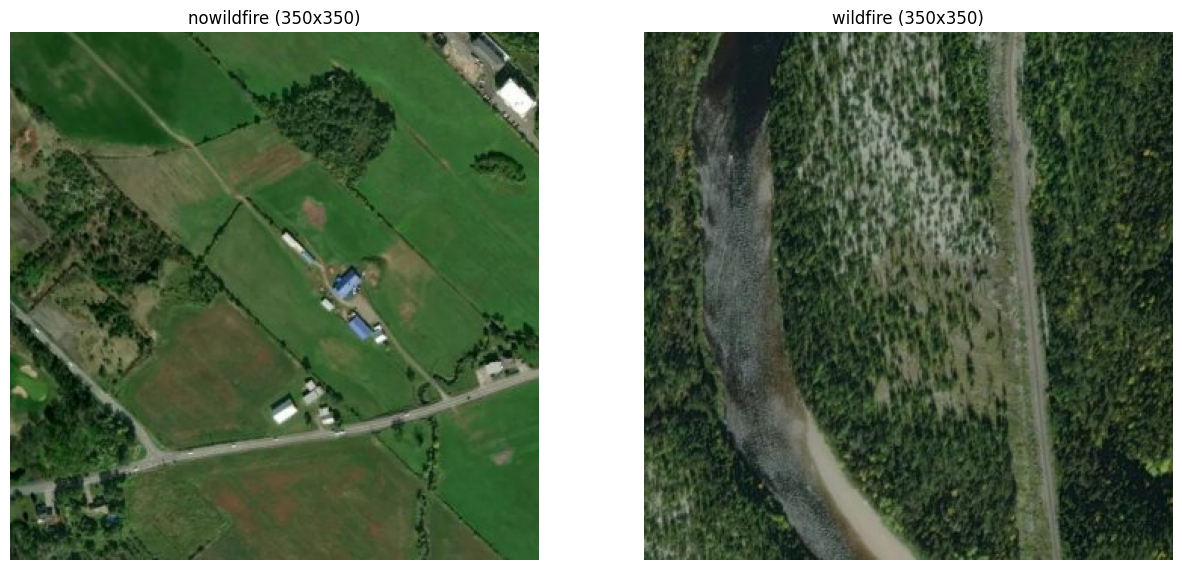

Validation set samples:


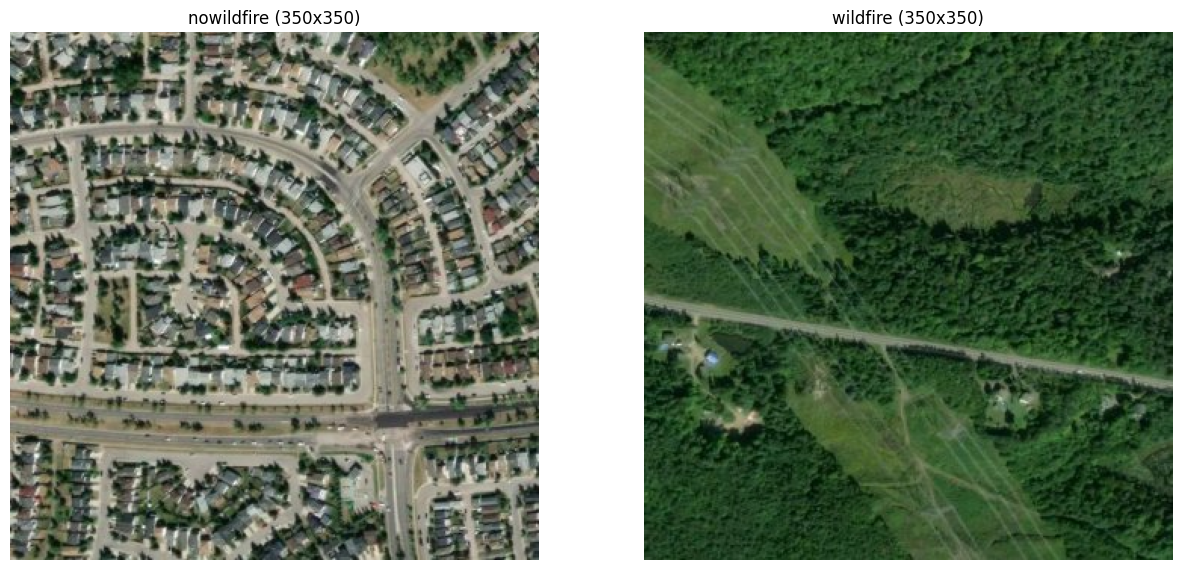

Test set samples:


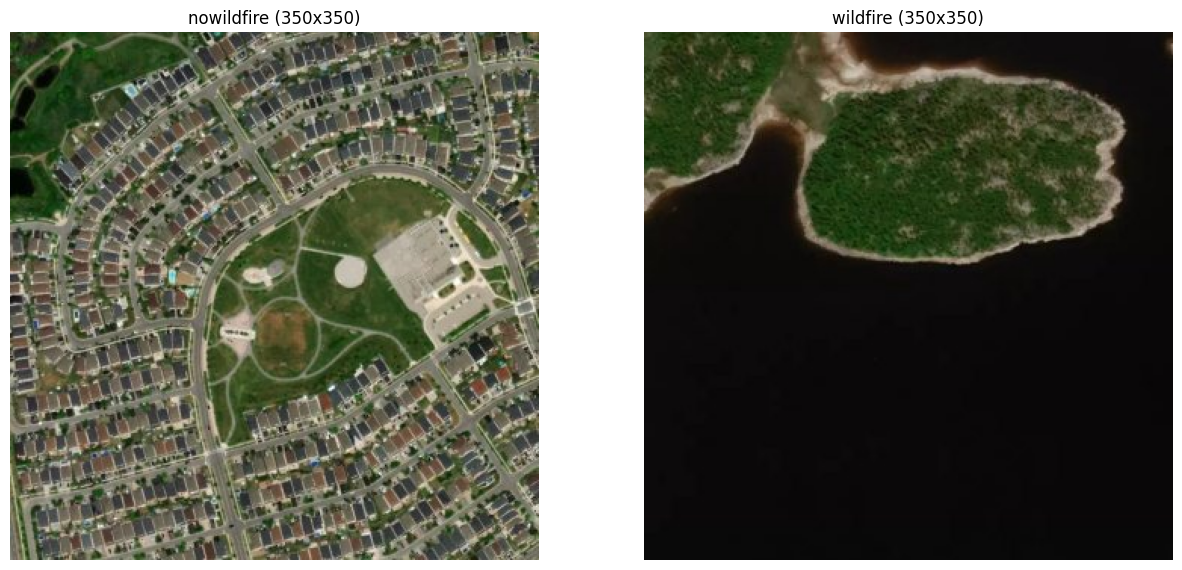

In [55]:
print("Training set samples:")
display_random_sample(train_dir)

print("Validation set samples:")
display_random_sample(valid_dir)

print("Test set samples:")
display_random_sample(test_dir)

In [78]:
x_train = []
y_train = []
for direct in os.listdir(train_dir):
    print("Loading dataset training {}".format(direct))
    for filename in os.listdir(os.path.join(train_dir,direct)):
        img_path = os.path.join(train_dir,direct,filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32,32))
        img = np.array(img)
        img = img/255
        x_train.append(img)
        y_train.append(direct)

Loading dataset training nowildfire
Loading dataset training wildfire


In [79]:
x_val=[]
y_val=[]
for direct in os.listdir(valid_dir):
    print("Loading dataset validation {}".format(direct))
    for filename in os.listdir(os.path.join(valid_dir,direct)):
        img_path = os.path.join(valid_dir,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_val.append(image)
        y_val.append(direct)

Loading dataset validation nowildfire
Loading dataset validation wildfire


In [80]:
x_test=[]
y_test=[]
for direct in os.listdir(test_dir):
    print("Loading dataset test {}".format(direct))
    for filename in os.listdir(os.path.join(test_dir,direct)):
        img_path = os.path.join(test_dir,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_test.append(image)
        y_test.append(direct)

Loading dataset test nowildfire
Loading dataset test wildfire


In [81]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

In [90]:
y_train[30000]

'wildfire'

In [91]:
y_train = [1 if label == 'wildfire' else 0 for label in y_train]
y_val = [1 if label == 'wildfire' else 0 for label in y_val]
y_test = [1 if label == 'wildfire' else 0 for label in y_test]

In [96]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [97]:
len(x_train[4][4])

32

In [ ]:
print("x_train shape:", x_train.shape)  
print("x_valid shape:", x_val.shape)
print("x_test shape:", x_test.shape)

print("y_train shape:", y_train.shape)
print("y_valid shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (30250, 32, 32, 3)
x_valid shape: (6300, 32, 32, 3)
x_test shape: (6300, 32, 32, 3)
y_train shape: (30250,)
y_valid shape: (6300,)
y_test shape: (6300,)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    BatchNormalization(),
    
    Dense(1, activation='sigmoid') 
])
model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15, 15, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,782,529 (6.80 MB)

 Trainable params: 1,781,313 (6.80 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 876s 2s/step - accuracy: 0.9082 - loss: 0.2347 - val_accuracy: 0.6575 - val_loss: 0.8456
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 806s 2s/step - accuracy: 0.9292 - loss: 0.1799 - val_accuracy: 0.8113 - val_loss: 0.4096
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 777s 2s/step - accuracy: 0.9345 - loss: 0.1695 - val_accuracy: 0.9314 - val_loss: 0.1705
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 773s 2s/step - accuracy: 0.9380 - loss: 0.1595 - val_accuracy: 0.9265 - val_loss: 0.2022
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 786s 2s/step - accuracy: 0.9437 - loss: 0.1474 - val_accuracy: 0.9405 - val_loss: 0.1749
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 863s 2s/step - accuracy: 0.9465 - loss: 0.1390 - val_accuracy: 0.7978 - val_loss: 0.4533
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 967s 2s/step - accuracy: 0.9514 - loss: 0.1269 - val_accuracy: 0.9410 - val_loss: 0.1476
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 706s 1s/step - accuracy: 0.9530 - loss: 0.1235 - val_accu

In [41]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Accuracy: {test_accuracy:.4f}')

197/197 ━━━━━━━━━━━━━━━━━━━━ 31s 159ms/step - accuracy: 0.9551 - loss: 0.1170
Test Accuracy: 0.9551


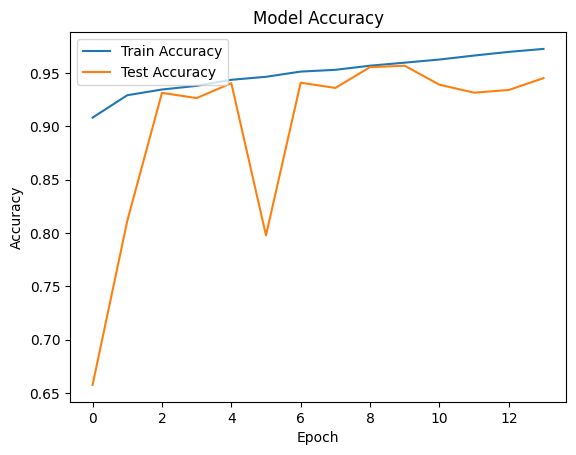

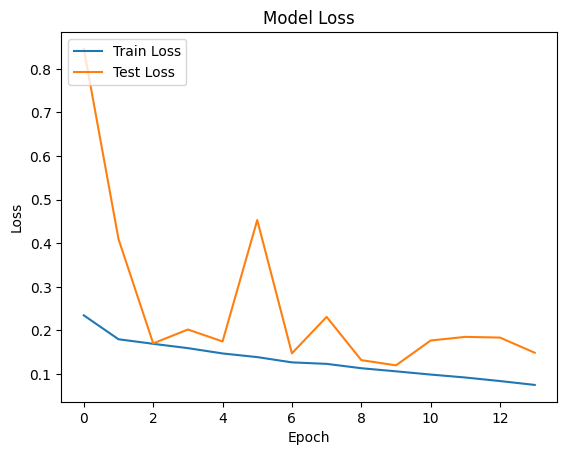

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_val_pred_classes = (y_val_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

946/946 ━━━━━━━━━━━━━━━━━━━━ 146s 154ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 31s 155ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 31s 156ms/step


Confusion matrix for train: 



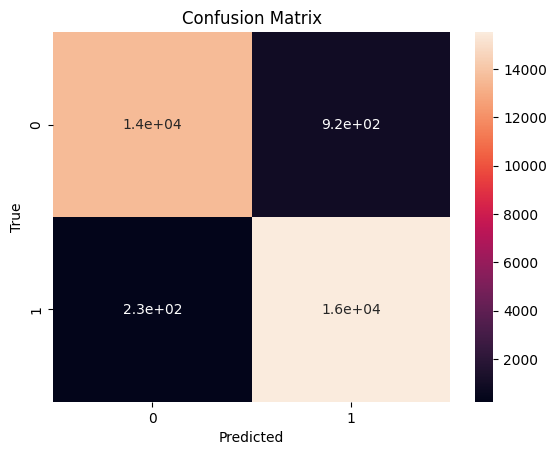

In [44]:
print("Confusion matrix for train: \n")
cm = confusion_matrix(y_train, y_train_pred_classes)
sns.heatmap(cm, annot=True)
plt.title(f"Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [45]:
from sklearn.metrics import  classification_report

print(f"classification report for train : \n{classification_report(y_train, y_train_pred_classes)}")

classification report for train : 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     14500
           1       0.94      0.99      0.96     15750

    accuracy                           0.96     30250
   macro avg       0.96      0.96      0.96     30250
weighted avg       0.96      0.96      0.96     30250



Confusion matrix for valid: 



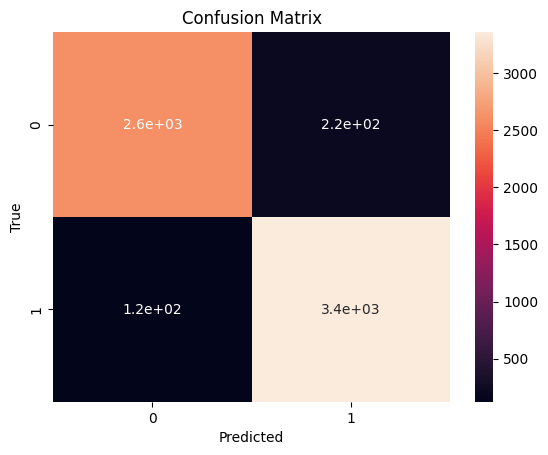

In [46]:
print("Confusion matrix for valid: \n")
cm = confusion_matrix(y_val, y_val_pred_classes)
sns.heatmap(cm, annot=True)
plt.title(f"Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [47]:
print(f"classification report for valid : \n{classification_report(y_val, y_val_pred_classes)}")

classification report for valid : 
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2820
           1       0.94      0.96      0.95      3480

    accuracy                           0.95      6300
   macro avg       0.95      0.94      0.94      6300
weighted avg       0.95      0.95      0.95      6300



Confusion matrix for test: 



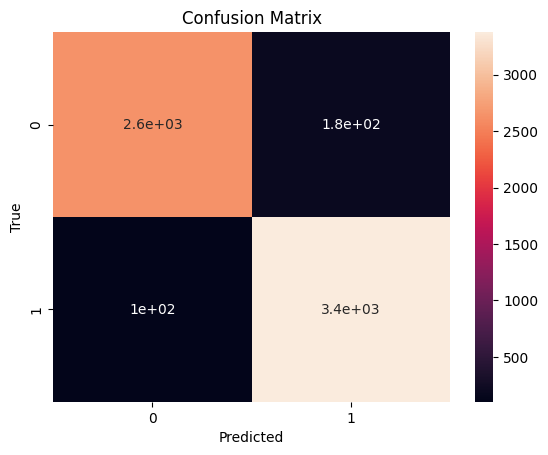

In [48]:
print("Confusion matrix for test: \n")
cm = confusion_matrix(y_test, y_test_pred_classes)
sns.heatmap(cm, annot=True)
plt.title(f"Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [49]:
print(f"classification report for test : \n{classification_report(y_test, y_test_pred_classes)}")

classification report for test : 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2820
           1       0.95      0.97      0.96      3480

    accuracy                           0.96      6300
   macro avg       0.96      0.95      0.95      6300
weighted avg       0.96      0.96      0.96      6300



In [50]:
save_path = '../backend/model/fire_predictor.pkl'
os.makedirs(os.path.dirname(save_path), exist_ok=True)

In [51]:
import joblib
joblib.dump(model, save_path)

['../backend/model/fire_predictor.pkl']